# Predict

In [76]:
import pandas as pd
import numpy as np
import tensorflow as tf
import progressbar

from sklearn.metrics import explained_variance_score, mean_absolute_error, median_absolute_error
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression, LinearRegression

import matplotlib.pyplot as plt

In [78]:
#df = pd.read_csv('c_data/data.csv')
df = pd.read_csv('c_data_html/data.csv')
df

,temp1,temp2,dewPt1,dewPt2,press1,press2,humid1,humid2,wdir1,wdir2,...,wspeed_max2,rain1,rain2,is_rain1,is_rain2,y_temp,y_temp_min,y_temp_max,y_rain,y_is_rain
0,26.5,27.1,21.0,21.0,1007.85,1008.36,74.6,70.6,9.0,6.0,...,15.0,0.0,0.0,0,0,27.2,24.0,32.0,0.0,0
1,27.1,27.2,21.0,21.9,1008.36,1008.59,70.6,73.4,6.0,8.0,...,19.0,0.0,0.0,0,0,27.4,23.0,32.0,0.0,0
2,27.2,27.4,21.9,20.0,1008.59,1007.80,73.4,65.2,8.0,4.0,...,17.0,0.0,0.0,0,0,27.0,23.0,33.0,0.0,0
3,27.4,27.0,20.0,21.8,1007.80,1007.95,65.2,74.7,4.0,6.0,...,17.0,0.0,0.0,0,0,26.5,23.0,33.0,0.0,0
4,27.0,26.5,21.8,21.3,1007.95,1008.61,74.7,74.8,6.0,6.0,...,28.0,0.0,0.0,0,0,26.7,21.0,33.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3633,27.2,27.2,20.9,22.2,1009.24,1009.80,70.1,75.7,11.0,11.0,...,15.0,0.0,0.0,0,0,27.0,23.0,33.0,0.0,0
3634,27.2,27.0,22.2,21.0,1009.80,1009.78,75.7,72.5,11.0,10.0,...,17.0,0.0,0.0,0,0,26.2,23.0,31.0,0.0,0
3635,27.0,26.2,21.0,20.5,1009.78,1010.34,72.5,72.7,10.0,12.0,...,13.0,0.0,0.0,0,0,26.6,21.0,32.0,0.0,0
3636,26.2,26.6,20.5,21.0,1010.34,1009.95,72.7,73.9,12.0,11.0,...,17.0,0.0,0.0,0,0,28.1,24.0,33.0,0.0,0


In [79]:
columns = ['y_temp', 'y_temp_min', 'y_temp_max', 'y_rain', 'y_is_rain']
X = df[[col for col in df.columns if col not in columns]]

# I. Linear Regression


In [80]:
def linear_regression(df, X, name_of_y, name_of_label, name_of_value):
    y = df[name_of_y]
    
    ##  Chia dataset 80% train và 20% test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)

    y_pred = regressor.predict(X_test)
    
    print("Dự đoán "+name_of_label)

    print(f"The Explained Variance: {regressor.score(X_test, y_test):.2f}")
    print(f"The Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f} "+name_of_value)
    print(f"The Median Absolute Error: {median_absolute_error(y_test, y_pred):.2f} "+name_of_value)
    print("-------------")

**Training**

In [81]:
linear_regression(df, X, 'y_temp', 'nhiệt độ trung bình', 'degrees celsius')
linear_regression(df, X, 'y_temp_min', 'nhiệt độ thấp nhất', 'degrees celsius')
linear_regression(df, X, 'y_temp_min', 'nhiệt độ cao nhất', 'degrees celsius')
linear_regression(df, X, 'y_rain', 'tỉ lệ mưa', '')

Dự đoán nhiệt độ trung bình
The Explained Variance: 0.71
The Mean Absolute Error: 0.60 degrees celsius
The Median Absolute Error: 0.47 degrees celsius
-------------
Dự đoán nhiệt độ thấp nhất
The Explained Variance: 0.69
The Mean Absolute Error: 0.77 degrees celsius
The Median Absolute Error: 0.63 degrees celsius
-------------
Dự đoán nhiệt độ cao nhất
The Explained Variance: 0.70
The Mean Absolute Error: 0.72 degrees celsius
The Median Absolute Error: 0.60 degrees celsius
-------------
Dự đoán tỉ lệ mưa
The Explained Variance: 0.28
The Mean Absolute Error: 0.04 
The Median Absolute Error: 0.02 
-------------


# II. Logistic Regression

In [86]:
def calculate_accuracy_classifier(pred, y):
    tp = np.sum(np.logical_and(pred, y))
    fp = np.sum(np.logical_and(pred, np.logical_not(y)))
    tn = np.sum(np.logical_and(np.logical_not(pred), np.logical_not(y)))
    fn = np.sum(np.logical_and(np.logical_not(pred), y))

    tpr = 0 if (tp + fn == 0) else float(tp) / float(tp + fn)
    fpr = 0 if (fp + tn == 0) else float(fp) / float(fp + tn)
    acc = float(tp + tn) / len(pred)
    
    print(f'Accuracy: {acc: .2f}')
    print(f'Tỉ lệ trả có lời khi kết quả là có TPR: {tpr: .2f}')
    print(f'Tỉ lệ trả lời có khi kết quả là không FPR: {fpr: .2f}')

In [87]:
def logistic_regression(df, X, name_of_y, name_of_label, name_of_value):
    y = df[name_of_y]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    clf = LogisticRegression(max_iter=10000)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    
    print("Dự đoán "+name_of_label)

    calculate_accuracy_classifier(y_pred,  y_test)
    
    return y_pred, y_test

In [88]:
y_pred, y_test = logistic_regression(df, X, 'y_is_rain', 'Có mưa hay không', '')

Dự đoán Có mưa hay không
Accuracy:  0.85
Tỉ lệ trả có lời khi kết quả là có TPR:  0.80
Tỉ lệ trả lời có khi kết quả là không FPR:  0.13


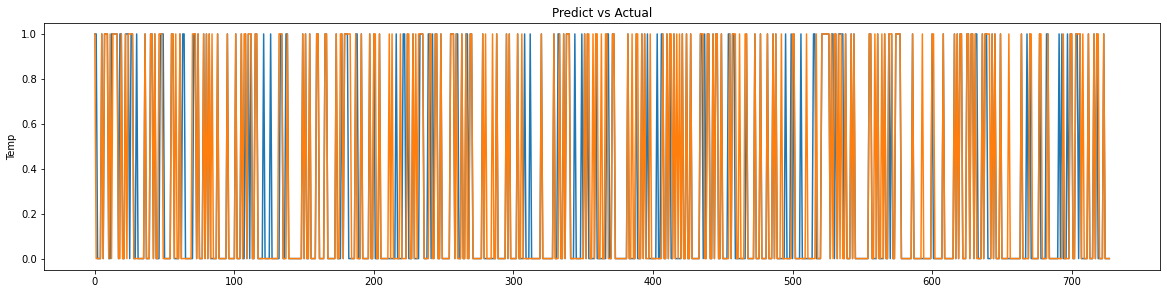

In [84]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(211)
ax.set_ylabel('Temp')
ax.set_title('Predict vs Actual')

ax.plot(np.array(y_test))
ax.plot(y_pred)